In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
import hvplot.pandas

In [2]:
clean_treat_df = pd.read_csv('filtered_global_health_statistics.csv')
clean_treat_df.head(10)

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
1,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,...,3.31,Surgery,15579,No,92.80,4535,0.89,60027,0.70,20.48
2,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,393296,...,3.54,Medication,15744,Yes,65.45,4584,9.81,23222,0.46,66.49
3,Nigeria,2007,Diabetes,Infectious,8.92,13.19,5.52,36-60,Female,227849,...,9.57,Therapy,45685,No,68.02,423,3.98,60608,0.61,68.17
4,France,2004,Measles,Bacterial,11.40,5.15,7.77,61+,Male,420730,...,0.73,Therapy,49545,Yes,52.40,968,1.11,64119,0.59,63.84
5,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,9.72,Medication,4664,No,87.75,484,8.11,56179,0.63,29.00
6,Nigeria,2009,Leprosy,Parasitic,15.18,14.95,8.21,0-18,Male,788926,...,4.49,Vaccination,31596,Yes,50.80,2773,0.79,6053,0.41,31.82
7,France,2015,Polio,Respiratory,14.44,5.69,2.21,19-35,Other,959930,...,6.93,Medication,48221,Yes,54.80,1537,6.49,99481,0.84,28.24
8,China,2001,Ebola,Neurological,2.92,1.17,7.35,36-60,Other,276364,...,3.57,Surgery,28401,Yes,51.53,1742,1.47,8526,0.40,31.50
9,Japan,2021,Diabetes,Autoimmune,11.24,4.78,5.68,19-35,Male,947147,...,1.20,Surgery,20397,Yes,98.55,4994,7.43,93229,0.64,46.04


In [3]:
clean_treat_df['Recovery Rate (%)'] = clean_treat_df['Recovery Rate (%)'].round(0)
clean_treat_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,77.0,2366,4.82,80639,0.74,45.52
1,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,...,3.31,Surgery,15579,No,93.0,4535,0.89,60027,0.70,20.48
2,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,393296,...,3.54,Medication,15744,Yes,65.0,4584,9.81,23222,0.46,66.49
3,Nigeria,2007,Diabetes,Infectious,8.92,13.19,5.52,36-60,Female,227849,...,9.57,Therapy,45685,No,68.0,423,3.98,60608,0.61,68.17
4,France,2004,Measles,Bacterial,11.40,5.15,7.77,61+,Male,420730,...,0.73,Therapy,49545,Yes,52.0,968,1.11,64119,0.59,63.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349701,Argentina,2000,Ebola,Genetic,18.25,4.74,3.71,61+,Other,506513,...,9.89,Surgery,49444,No,52.0,1359,2.47,25620,0.84,20.23
349702,Nigeria,2016,Zika,Autoimmune,1.82,4.01,7.02,19-35,Other,768587,...,3.58,Surgery,8739,Yes,78.0,4574,0.32,45591,0.41,20.76
349703,Nigeria,2006,Zika,Metabolic,16.10,12.34,8.94,61+,Other,124723,...,1.89,Medication,21911,No,90.0,1151,1.57,77038,0.81,87.64
349704,USA,2016,Zika,Respiratory,13.44,14.13,1.91,19-35,Other,807915,...,8.11,Therapy,18807,No,87.0,3338,7.31,62897,0.72,46.90


In [4]:
sorted_df = clean_treat_df.sort_values(by='Improvement in 5 Years (%)', ascending=False)
sorted_df = sorted_df[sorted_df["Disease Name"].isin(['COVID-19'])]
sorted_df.head(30)

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
70869,USA,2005,COVID-19,Cardiovascular,3.89,4.43,3.08,19-35,Other,838714,...,4.00,Therapy,21692,Yes,73.0,3508,10.00,52759,0.81,79.82
288356,Japan,2012,COVID-19,Genetic,9.60,6.27,0.79,61+,Female,818400,...,0.65,Surgery,26569,Yes,52.0,3732,10.00,91154,0.63,85.76
115474,Argentina,2006,COVID-19,Respiratory,19.71,2.07,9.98,19-35,Male,257702,...,3.69,Surgery,18102,Yes,93.0,4121,10.00,26363,0.75,74.30
346371,Germany,2001,COVID-19,Chronic,13.63,6.13,7.50,36-60,Female,341961,...,2.15,Vaccination,2814,No,69.0,2233,10.00,38036,0.64,42.35
126165,Japan,2001,COVID-19,Respiratory,11.86,8.42,5.92,0-18,Other,883821,...,0.91,Medication,26057,No,82.0,3092,10.00,71871,0.49,52.78
91408,Nigeria,2015,COVID-19,Bacterial,2.80,11.15,8.92,36-60,Other,787243,...,8.17,Therapy,32519,Yes,77.0,4208,9.99,31760,0.71,47.72
219007,France,2021,COVID-19,Genetic,13.50,1.10,0.16,19-35,Male,411787,...,9.87,Vaccination,47563,Yes,79.0,4291,9.99,69944,0.63,61.38
213336,Nigeria,2015,COVID-19,Bacterial,5.59,1.61,2.38,19-35,Female,517585,...,6.02,Surgery,1699,Yes,67.0,655,9.99,62710,0.86,60.21
199192,China,2024,COVID-19,Neurological,7.42,6.51,0.61,36-60,Other,861980,...,8.73,Surgery,10466,Yes,98.0,2861,9.99,62542,0.87,41.73
331282,China,2023,COVID-19,Metabolic,13.58,5.51,5.71,0-18,Male,991339,...,1.46,Medication,33347,Yes,65.0,952,9.99,77528,0.67,54.79


In [5]:
countries_to_include = ['USA']
USA_df = clean_treat_df[clean_treat_df['Country'].isin(countries_to_include)]
USA_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
1,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,...,3.31,Surgery,15579,No,93.0,4535,0.89,60027,0.70,20.48
5,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,9.72,Medication,4664,No,88.0,484,8.11,56179,0.63,29.00
10,USA,2000,Asthma,Metabolic,7.91,9.13,1.58,0-18,Male,365955,...,4.67,Therapy,8688,No,79.0,1480,9.56,85413,0.40,31.14
20,USA,2011,Dengue,Chronic,10.45,11.76,5.57,36-60,Male,87481,...,1.49,Therapy,33766,Yes,80.0,393,9.96,56348,0.65,74.74
29,USA,2002,Hepatitis,Respiratory,7.13,6.96,4.02,61+,Other,251611,...,2.55,Therapy,45671,Yes,94.0,1869,1.21,84905,0.82,88.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349683,USA,2018,Asthma,Viral,1.74,0.25,9.01,61+,Other,447187,...,9.60,Surgery,16097,Yes,61.0,2108,3.93,94572,0.43,40.60
349690,USA,2003,Zika,Metabolic,13.48,3.14,3.64,36-60,Male,338610,...,7.00,Vaccination,24040,Yes,54.0,1895,7.06,4135,0.60,35.97
349693,USA,2005,Diabetes,Genetic,0.45,10.99,9.89,61+,Male,607531,...,0.78,Medication,3338,Yes,97.0,513,0.40,19548,0.78,80.64
349694,USA,2024,COVID-19,Infectious,10.56,8.92,3.10,61+,Other,509069,...,8.08,Therapy,25536,No,72.0,1448,5.01,69574,0.55,84.37


In [6]:
disease_to_include = ['COVID-19']
covid_df = USA_df[USA_df['Disease Name'].isin(disease_to_include)]
covid_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
78,USA,2005,COVID-19,Genetic,7.45,13.13,6.72,19-35,Other,985973,...,1.41,Medication,35309,No,64.0,3353,2.17,9984,0.90,43.01
145,USA,2011,COVID-19,Bacterial,7.69,13.46,6.40,36-60,Female,128263,...,3.85,Surgery,4235,No,56.0,443,4.09,32467,0.59,20.82
266,USA,2007,COVID-19,Autoimmune,0.71,8.43,8.33,36-60,Female,361093,...,9.99,Surgery,38614,Yes,98.0,49,5.42,75876,0.51,89.70
405,USA,2014,COVID-19,Chronic,1.62,2.69,6.84,19-35,Other,534563,...,1.32,Vaccination,14830,No,87.0,3075,0.38,95733,0.50,72.71
484,USA,2012,COVID-19,Autoimmune,5.20,1.37,2.45,36-60,Other,955270,...,6.76,Medication,37640,Yes,81.0,3772,1.97,42933,0.82,46.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348889,USA,2014,COVID-19,Neurological,10.51,11.47,9.45,36-60,Male,276859,...,5.84,Vaccination,11434,No,76.0,2039,7.71,58196,0.86,56.76
349138,USA,2009,COVID-19,Genetic,19.19,13.83,2.79,19-35,Male,837620,...,2.08,Therapy,25989,No,57.0,715,2.37,9925,0.57,38.11
349171,USA,2023,COVID-19,Bacterial,9.60,6.87,2.36,0-18,Other,220431,...,4.58,Surgery,8886,Yes,74.0,3163,6.93,82047,0.63,60.87
349559,USA,2010,COVID-19,Bacterial,8.38,8.21,7.48,36-60,Female,898620,...,8.16,Medication,36678,Yes,52.0,441,0.54,26067,0.78,72.95


In [7]:
age_group_included = ['19-35']
age_df = covid_df[covid_df['Age Group'].isin(age_group_included)]
age_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
78,USA,2005,COVID-19,Genetic,7.45,13.13,6.72,19-35,Other,985973,...,1.41,Medication,35309,No,64.0,3353,2.17,9984,0.90,43.01
405,USA,2014,COVID-19,Chronic,1.62,2.69,6.84,19-35,Other,534563,...,1.32,Vaccination,14830,No,87.0,3075,0.38,95733,0.50,72.71
800,USA,2014,COVID-19,Parasitic,16.79,3.53,2.66,19-35,Male,241858,...,2.63,Medication,12652,No,82.0,1838,8.28,18781,0.46,28.86
963,USA,2005,COVID-19,Cardiovascular,10.55,12.90,3.77,19-35,Female,54890,...,4.23,Therapy,7748,No,90.0,3801,7.10,53351,0.52,65.64
1595,USA,2024,COVID-19,Genetic,16.61,10.25,3.79,19-35,Male,749940,...,5.01,Therapy,12112,Yes,98.0,1009,8.94,81670,0.72,67.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347687,USA,2000,COVID-19,Genetic,7.04,5.36,5.33,19-35,Other,157094,...,8.05,Medication,13572,Yes,79.0,4244,5.44,87259,0.48,52.29
348367,USA,2009,COVID-19,Genetic,15.28,5.97,1.99,19-35,Male,210486,...,3.62,Medication,2878,Yes,62.0,88,7.44,53875,0.64,51.11
348460,USA,2024,COVID-19,Viral,16.48,11.30,7.30,19-35,Female,243106,...,7.05,Therapy,49619,Yes,64.0,2048,7.30,36574,0.67,61.09
348629,USA,2003,COVID-19,Autoimmune,18.63,3.46,5.00,19-35,Other,804410,...,2.36,Surgery,13081,No,55.0,2071,8.22,83549,0.42,82.28


In [8]:
disease_cat_to_keep = ['Infectious']
cat_df = age_df[age_df['Disease Category'].isin(disease_cat_to_keep)]
cat_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
4239,USA,2005,COVID-19,Infectious,5.25,14.90,0.87,19-35,Other,60824,...,6.07,Medication,36091,No,94.0,3571,4.55,75734,0.64,31.79
9110,USA,2012,COVID-19,Infectious,15.86,8.46,2.67,19-35,Male,265367,...,5.81,Therapy,43565,No,64.0,4252,3.20,28702,0.48,69.80
28329,USA,2014,COVID-19,Infectious,2.95,5.55,0.16,19-35,Male,231585,...,7.09,Therapy,28891,No,56.0,2703,5.23,74132,0.44,68.28
31168,USA,2023,COVID-19,Infectious,18.71,6.72,4.71,19-35,Male,679275,...,3.29,Vaccination,39095,Yes,93.0,4731,3.97,37038,0.68,39.41
36119,USA,2014,COVID-19,Infectious,7.69,7.09,6.99,19-35,Other,80912,...,0.77,Surgery,11583,Yes,54.0,3611,2.88,19971,0.83,87.30
37654,USA,2017,COVID-19,Infectious,12.22,3.33,3.18,19-35,Other,830292,...,9.46,Vaccination,2133,No,54.0,954,1.48,98847,0.82,41.06
47415,USA,2023,COVID-19,Infectious,13.87,0.12,7.47,19-35,Female,293818,...,3.09,Vaccination,11772,No,71.0,4496,5.46,81660,0.72,70.47
50177,USA,2022,COVID-19,Infectious,1.00,9.59,2.87,19-35,Other,327757,...,6.91,Medication,47372,Yes,89.0,4186,1.25,91911,0.64,75.61
67723,USA,2010,COVID-19,Infectious,0.85,0.93,1.46,19-35,Female,763072,...,0.79,Surgery,19569,Yes,91.0,351,9.18,52079,0.79,33.11
80655,USA,2004,COVID-19,Infectious,6.79,4.58,7.86,19-35,Other,762312,...,9.83,Medication,33422,Yes,54.0,745,2.11,80342,0.53,81.07


In [9]:
outlier_values = [94, 57, 65, 97, 71]
clean_outliers = cat_df[cat_df['Recovery Rate (%)'].isin(outlier_values)].index
clean_outliers_df = cat_df.drop(clean_outliers)
clean_outliers_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
9110,USA,2012,COVID-19,Infectious,15.86,8.46,2.67,19-35,Male,265367,...,5.81,Therapy,43565,No,64.0,4252,3.20,28702,0.48,69.80
28329,USA,2014,COVID-19,Infectious,2.95,5.55,0.16,19-35,Male,231585,...,7.09,Therapy,28891,No,56.0,2703,5.23,74132,0.44,68.28
31168,USA,2023,COVID-19,Infectious,18.71,6.72,4.71,19-35,Male,679275,...,3.29,Vaccination,39095,Yes,93.0,4731,3.97,37038,0.68,39.41
36119,USA,2014,COVID-19,Infectious,7.69,7.09,6.99,19-35,Other,80912,...,0.77,Surgery,11583,Yes,54.0,3611,2.88,19971,0.83,87.30
37654,USA,2017,COVID-19,Infectious,12.22,3.33,3.18,19-35,Other,830292,...,9.46,Vaccination,2133,No,54.0,954,1.48,98847,0.82,41.06
50177,USA,2022,COVID-19,Infectious,1.00,9.59,2.87,19-35,Other,327757,...,6.91,Medication,47372,Yes,89.0,4186,1.25,91911,0.64,75.61
67723,USA,2010,COVID-19,Infectious,0.85,0.93,1.46,19-35,Female,763072,...,0.79,Surgery,19569,Yes,91.0,351,9.18,52079,0.79,33.11
80655,USA,2004,COVID-19,Infectious,6.79,4.58,7.86,19-35,Other,762312,...,9.83,Medication,33422,Yes,54.0,745,2.11,80342,0.53,81.07
87413,USA,2024,COVID-19,Infectious,5.14,10.37,2.92,19-35,Female,352679,...,1.75,Vaccination,36464,No,63.0,1874,9.52,25164,0.80,40.33
98416,USA,2000,COVID-19,Infectious,18.09,5.55,5.64,19-35,Male,486449,...,6.37,Vaccination,13841,Yes,68.0,3493,8.08,75384,0.65,57.52


In [10]:
medication = ['Medication']
med_df = clean_outliers_df[clean_outliers_df['Treatment Type'].isin(medication)]
med_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
50177,USA,2022,COVID-19,Infectious,1.00,9.59,2.87,19-35,Other,327757,...,6.91,Medication,47372,Yes,89.0,4186,1.25,91911,0.64,75.61
80655,USA,2004,COVID-19,Infectious,6.79,4.58,7.86,19-35,Other,762312,...,9.83,Medication,33422,Yes,54.0,745,2.11,80342,0.53,81.07
131144,USA,2021,COVID-19,Infectious,10.13,11.90,8.30,19-35,Female,184260,...,6.41,Medication,47207,No,91.0,4278,8.21,19743,0.85,86.41
165188,USA,2021,COVID-19,Infectious,1.58,12.75,8.26,19-35,Male,544693,...,0.79,Medication,19002,Yes,86.0,2087,9.61,69495,0.55,59.26
176254,USA,2019,COVID-19,Infectious,16.71,11.47,6.98,19-35,Other,995220,...,5.81,Medication,27085,No,72.0,787,3.38,59952,0.60,62.86
186654,USA,2018,COVID-19,Infectious,9.42,9.53,4.59,19-35,Other,881531,...,9.98,Medication,27218,No,76.0,149,6.17,53626,0.74,55.95
268827,USA,2012,COVID-19,Infectious,19.03,11.53,5.65,19-35,Female,248130,...,7.17,Medication,15120,Yes,76.0,4129,7.52,5459,0.73,58.81
294125,USA,2023,COVID-19,Infectious,6.90,10.06,5.09,19-35,Female,594416,...,7.75,Medication,22353,No,88.0,4422,3.53,30123,0.54,63.57
334412,USA,2004,COVID-19,Infectious,1.77,8.62,5.01,19-35,Male,7926,...,5.62,Medication,22667,No,52.0,3000,4.60,12421,0.42,79.82
343786,USA,2018,COVID-19,Infectious,1.58,11.95,1.99,19-35,Other,773741,...,2.20,Medication,16022,No,74.0,1786,2.13,87803,0.86,30.99


In [11]:
USA_plot = med_df.hvplot.scatter(
    x="Year",
    y="Recovery Rate (%)",
    title="USA Recovery Rate for COVID-19 over Time"
)
USA_plot

:Scatter   [Year]   (Recovery Rate (%))

In [12]:
X = med_df['Year'].values.reshape(-1,1)
y = med_df['Recovery Rate (%)']


In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [1.80728709]
Model's y-intercept: -3568.0522388059694
Model's formula: y = -3568.0522388059694 + 1.8072870939420542X


In [15]:
predicted_y_values = model.predict(X)

In [16]:
df_recovery_predicted = med_df.copy()
df_recovery_predicted["Predicted Recovery"] = predicted_y_values
df_recovery_predicted.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Predicted Recovery
50177,USA,2022,COVID-19,Infectious,1.00,9.59,2.87,19-35,Other,327757,...,Medication,47372,Yes,89.0,4186,1.25,91911,0.64,75.61,86.282265
80655,USA,2004,COVID-19,Infectious,6.79,4.58,7.86,19-35,Other,762312,...,Medication,33422,Yes,54.0,745,2.11,80342,0.53,81.07,53.751097
131144,USA,2021,COVID-19,Infectious,10.13,11.90,8.30,19-35,Female,184260,...,Medication,47207,No,91.0,4278,8.21,19743,0.85,86.41,84.474978
165188,USA,2021,COVID-19,Infectious,1.58,12.75,8.26,19-35,Male,544693,...,Medication,19002,Yes,86.0,2087,9.61,69495,0.55,59.26,84.474978
176254,USA,2019,COVID-19,Infectious,16.71,11.47,6.98,19-35,Other,995220,...,Medication,27085,No,72.0,787,3.38,59952,0.60,62.86,80.860404


In [17]:
best_fit_line = df_recovery_predicted.hvplot.line(
    x = "Year",
    y = "Predicted Recovery",
    color = "red"
)
best_fit_line

:Curve   [Year]   (Predicted Recovery)

In [18]:
USA_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [Year]   (Recovery Rate (%))
   .Curve.I   :Curve   [Year]   (Predicted Recovery)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.8663950821797256.
The r2 is 0.8663950821797256.
The mean squared error is 22.947980684810336.
The root mean squared error is 4.79040506479466.
The standard deviation is 13.105723940324701.


In [20]:
countries_to_include = ['France']
France_df = clean_treat_df[clean_treat_df['Country'].isin(countries_to_include)]
France_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,77.0,2366,4.82,80639,0.74,45.52
4,France,2004,Measles,Bacterial,11.40,5.15,7.77,61+,Male,420730,...,0.73,Therapy,49545,Yes,52.0,968,1.11,64119,0.59,63.84
7,France,2015,Polio,Respiratory,14.44,5.69,2.21,19-35,Other,959930,...,6.93,Medication,48221,Yes,55.0,1537,6.49,99481,0.84,28.24
12,France,2005,Diabetes,Metabolic,6.09,10.77,1.42,19-35,Other,267802,...,9.14,Medication,27027,No,83.0,3580,9.46,66816,0.60,48.75
14,France,2008,Tuberculosis,Respiratory,4.60,4.94,2.08,61+,Female,215901,...,0.86,Therapy,35024,Yes,74.0,3893,0.04,35337,0.49,80.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349665,France,2006,Tuberculosis,Infectious,3.98,5.30,7.12,36-60,Male,188474,...,3.92,Surgery,14079,Yes,85.0,3240,1.47,39380,0.45,45.87
349674,France,2000,Parkinson's Disease,Metabolic,6.50,4.43,9.59,36-60,Male,509968,...,2.09,Medication,19577,No,61.0,4582,5.98,38690,0.76,33.28
349675,France,2004,Influenza,Infectious,7.36,0.21,0.92,61+,Female,206959,...,9.94,Therapy,37100,No,64.0,4742,0.85,96710,0.58,25.04
349691,France,2012,Asthma,Genetic,3.94,6.53,8.07,0-18,Female,837778,...,8.27,Vaccination,37810,No,65.0,4729,4.01,26372,0.44,20.42


In [21]:
disease_include = ['COVID-19']
disease_df = France_df[France_df['Disease Name'].isin(disease_include)]
disease_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
151,France,2013,COVID-19,Respiratory,12.00,13.39,0.90,61+,Female,975815,...,1.96,Vaccination,19458,Yes,50.0,1162,3.25,78867,0.43,80.37
354,France,2008,COVID-19,Infectious,9.30,3.25,8.32,19-35,Female,153839,...,5.99,Vaccination,4062,No,57.0,4633,1.11,8737,0.88,70.76
410,France,2009,COVID-19,Neurological,12.67,4.82,9.49,36-60,Female,542095,...,2.41,Medication,23209,No,95.0,85,5.23,25891,0.45,41.72
433,France,2017,COVID-19,Cardiovascular,0.34,1.99,9.80,36-60,Female,310643,...,3.28,Therapy,4577,Yes,98.0,4780,8.29,10433,0.54,66.23
621,France,2016,COVID-19,Viral,13.79,10.33,7.78,0-18,Female,85861,...,7.13,Therapy,17834,No,58.0,3373,9.76,18032,0.68,66.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349202,France,2009,COVID-19,Genetic,10.37,7.64,3.01,0-18,Female,704258,...,2.23,Therapy,1408,No,68.0,2643,8.37,54704,0.61,68.14
349214,France,2023,COVID-19,Infectious,13.27,8.64,3.99,0-18,Female,989291,...,5.46,Medication,8606,Yes,65.0,2201,9.44,48310,0.79,70.11
349287,France,2021,COVID-19,Autoimmune,8.99,12.55,0.65,0-18,Male,263843,...,9.00,Vaccination,14658,Yes,94.0,1835,3.61,99627,0.42,31.66
349516,France,2009,COVID-19,Genetic,2.37,5.09,2.57,36-60,Other,472743,...,5.56,Medication,26732,No,63.0,4530,7.06,86232,0.52,74.04


In [22]:
age_included = ['19-35']
youth_df = disease_df[disease_df['Age Group'].isin(age_included)]
youth_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
354,France,2008,COVID-19,Infectious,9.30,3.25,8.32,19-35,Female,153839,...,5.99,Vaccination,4062,No,57.0,4633,1.11,8737,0.88,70.76
1156,France,2019,COVID-19,Metabolic,2.22,4.70,5.45,19-35,Other,62045,...,2.03,Surgery,9436,No,95.0,2124,9.42,25229,0.58,21.44
1998,France,2003,COVID-19,Viral,17.91,9.65,0.59,19-35,Female,258745,...,2.09,Medication,6850,Yes,70.0,2981,4.73,37668,0.74,74.41
2631,France,2005,COVID-19,Autoimmune,18.00,11.11,3.24,19-35,Other,539440,...,9.55,Vaccination,843,No,68.0,285,1.11,15173,0.79,67.31
2767,France,2015,COVID-19,Infectious,4.25,12.74,8.28,19-35,Other,32396,...,6.95,Vaccination,49921,Yes,80.0,4524,4.18,82851,0.45,72.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345860,France,2014,COVID-19,Chronic,13.63,12.91,1.96,19-35,Female,353515,...,9.28,Therapy,39809,Yes,89.0,422,7.11,83654,0.58,29.05
346600,France,2019,COVID-19,Respiratory,1.55,14.76,7.15,19-35,Other,300624,...,7.88,Therapy,41734,Yes,89.0,3379,1.61,70480,0.49,43.19
347379,France,2005,COVID-19,Metabolic,15.64,3.69,8.21,19-35,Male,239285,...,2.89,Vaccination,9462,Yes,97.0,2295,2.62,20058,0.51,28.40
347947,France,2017,COVID-19,Autoimmune,9.66,14.25,1.27,19-35,Male,909108,...,9.57,Vaccination,39319,Yes,55.0,2709,4.00,22983,0.56,56.23


In [23]:
cat_to_keep = ['Infectious']
category_df = youth_df[youth_df['Disease Category'].isin(cat_to_keep)]
category_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
354,France,2008,COVID-19,Infectious,9.30,3.25,8.32,19-35,Female,153839,...,5.99,Vaccination,4062,No,57.0,4633,1.11,8737,0.88,70.76
2767,France,2015,COVID-19,Infectious,4.25,12.74,8.28,19-35,Other,32396,...,6.95,Vaccination,49921,Yes,80.0,4524,4.18,82851,0.45,72.55
3989,France,2008,COVID-19,Infectious,18.41,13.17,2.49,19-35,Other,459452,...,9.36,Therapy,29358,Yes,53.0,1034,5.11,80576,0.48,68.64
26115,France,2008,COVID-19,Infectious,9.76,11.19,7.89,19-35,Other,257258,...,5.92,Therapy,46399,No,52.0,1989,5.16,11561,0.48,71.31
27693,France,2009,COVID-19,Infectious,0.30,6.32,7.22,19-35,Female,422474,...,0.62,Medication,44863,No,72.0,2974,2.48,53666,0.44,38.61
38878,France,2002,COVID-19,Infectious,5.89,7.13,2.66,19-35,Male,748412,...,7.30,Surgery,46605,No,95.0,2669,9.07,67456,0.63,57.73
39443,France,2023,COVID-19,Infectious,5.49,13.38,1.18,19-35,Male,841565,...,5.05,Therapy,17185,No,97.0,356,1.24,63581,0.83,78.09
39783,France,2005,COVID-19,Infectious,13.83,8.56,9.08,19-35,Other,541037,...,6.70,Medication,20788,No,76.0,591,9.14,12013,0.73,23.11
47227,France,2022,COVID-19,Infectious,6.79,7.25,0.88,19-35,Other,184464,...,8.55,Medication,4044,Yes,71.0,3552,6.53,30253,0.46,86.84
52599,France,2024,COVID-19,Infectious,13.17,2.00,3.96,19-35,Female,929094,...,1.69,Surgery,35695,Yes,87.0,4877,5.35,70545,0.59,44.10


In [24]:
outlier_vals = [98, 55, 60, 52, 64, 70, 71]
outliers = category_df[category_df['Recovery Rate (%)'].isin(outlier_vals)].index
no_outliers_df = category_df.drop(outliers)
no_outliers_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
354,France,2008,COVID-19,Infectious,9.30,3.25,8.32,19-35,Female,153839,...,5.99,Vaccination,4062,No,57.0,4633,1.11,8737,0.88,70.76
2767,France,2015,COVID-19,Infectious,4.25,12.74,8.28,19-35,Other,32396,...,6.95,Vaccination,49921,Yes,80.0,4524,4.18,82851,0.45,72.55
3989,France,2008,COVID-19,Infectious,18.41,13.17,2.49,19-35,Other,459452,...,9.36,Therapy,29358,Yes,53.0,1034,5.11,80576,0.48,68.64
27693,France,2009,COVID-19,Infectious,0.30,6.32,7.22,19-35,Female,422474,...,0.62,Medication,44863,No,72.0,2974,2.48,53666,0.44,38.61
38878,France,2002,COVID-19,Infectious,5.89,7.13,2.66,19-35,Male,748412,...,7.30,Surgery,46605,No,95.0,2669,9.07,67456,0.63,57.73
39443,France,2023,COVID-19,Infectious,5.49,13.38,1.18,19-35,Male,841565,...,5.05,Therapy,17185,No,97.0,356,1.24,63581,0.83,78.09
39783,France,2005,COVID-19,Infectious,13.83,8.56,9.08,19-35,Other,541037,...,6.70,Medication,20788,No,76.0,591,9.14,12013,0.73,23.11
52599,France,2024,COVID-19,Infectious,13.17,2.00,3.96,19-35,Female,929094,...,1.69,Surgery,35695,Yes,87.0,4877,5.35,70545,0.59,44.10
60947,France,2021,COVID-19,Infectious,6.13,3.83,9.73,19-35,Male,367129,...,2.85,Vaccination,2786,Yes,54.0,307,2.80,18285,0.50,27.90
82831,France,2002,COVID-19,Infectious,18.71,13.30,9.41,19-35,Female,520069,...,5.62,Medication,13078,Yes,54.0,4783,0.20,6520,0.52,20.66


In [25]:
treatment_type = ['Medication']
medication_df = no_outliers_df[no_outliers_df['Treatment Type'].isin(treatment_type)]
medication_df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
27693,France,2009,COVID-19,Infectious,0.30,6.32,7.22,19-35,Female,422474,...,0.62,Medication,44863,No,72.0,2974,2.48,53666,0.44,38.61
39783,France,2005,COVID-19,Infectious,13.83,8.56,9.08,19-35,Other,541037,...,6.70,Medication,20788,No,76.0,591,9.14,12013,0.73,23.11
82831,France,2002,COVID-19,Infectious,18.71,13.30,9.41,19-35,Female,520069,...,5.62,Medication,13078,Yes,54.0,4783,0.20,6520,0.52,20.66
88597,France,2011,COVID-19,Infectious,4.38,10.54,5.47,19-35,Other,674848,...,1.89,Medication,49789,Yes,86.0,3618,4.46,47897,0.87,22.51
106893,France,2008,COVID-19,Infectious,16.79,4.98,3.78,19-35,Female,267328,...,5.92,Medication,30858,No,83.0,1523,5.22,26745,0.89,35.27
108912,France,2020,COVID-19,Infectious,7.48,13.77,1.29,19-35,Male,685858,...,1.48,Medication,44726,Yes,97.0,4588,1.91,2029,0.79,51.28
127928,France,2011,COVID-19,Infectious,2.41,4.47,7.15,19-35,Female,304431,...,1.86,Medication,28569,Yes,74.0,3182,8.36,4220,0.53,23.33
138841,France,2015,COVID-19,Infectious,2.20,0.82,2.30,19-35,Female,22580,...,1.64,Medication,25650,No,90.0,2751,9.77,96202,0.45,45.76
157432,France,2016,COVID-19,Infectious,14.32,7.87,0.78,19-35,Female,615871,...,7.50,Medication,23185,Yes,96.0,2264,2.27,9110,0.61,72.51
166221,France,2011,COVID-19,Infectious,15.00,2.44,8.91,19-35,Other,691125,...,6.10,Medication,46139,No,80.0,2691,0.46,95717,0.84,73.79


In [26]:
France_plot = medication_df.hvplot.scatter(
    x="Year",
    y="Recovery Rate (%)",
    title="France Recovery Rate for COVID-19 over Time"
)
France_plot

:Scatter   [Year]   (Recovery Rate (%))

In [27]:
X = medication_df['Year'].values.reshape(-1,1)
y = medication_df['Recovery Rate (%)']

In [28]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [2.29667382]
Model's y-intercept: -4537.741952789701
Model's formula: y = -4537.741952789701 + 2.2966738197424896X


In [30]:
pred_y_values = model.predict(X)

In [31]:
recovery_predicted_df = medication_df.copy()

# Add a column with the predicted sales values
recovery_predicted_df["Predicted Recovery"] = pred_y_values

# Display sample data
recovery_predicted_df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Predicted Recovery
27693,France,2009,COVID-19,Infectious,0.30,6.32,7.22,19-35,Female,422474,...,Medication,44863,No,72.0,2974,2.48,53666,0.44,38.61,76.275751
39783,France,2005,COVID-19,Infectious,13.83,8.56,9.08,19-35,Other,541037,...,Medication,20788,No,76.0,591,9.14,12013,0.73,23.11,67.089056
82831,France,2002,COVID-19,Infectious,18.71,13.30,9.41,19-35,Female,520069,...,Medication,13078,Yes,54.0,4783,0.20,6520,0.52,20.66,60.199034
88597,France,2011,COVID-19,Infectious,4.38,10.54,5.47,19-35,Other,674848,...,Medication,49789,Yes,86.0,3618,4.46,47897,0.87,22.51,80.869099
106893,France,2008,COVID-19,Infectious,16.79,4.98,3.78,19-35,Female,267328,...,Medication,30858,No,83.0,1523,5.22,26745,0.89,35.27,73.979077


In [32]:
best_line = recovery_predicted_df.hvplot.line(
    x = "Year",
    y = "Predicted Recovery",
    color = "red"
)
best_line

:Curve   [Year]   (Predicted Recovery)

In [33]:
best_line * France_plot

:Overlay
   .Curve.I   :Curve   [Year]   (Predicted Recovery)
   .Scatter.I :Scatter   [Year]   (Recovery Rate (%))

In [34]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, pred_y_values)
mse = mean_squared_error(y, pred_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.839844590613955.
The r2 is 0.839844590613955.
The mean squared error is 30.99073351541205.
The root mean squared error is 5.566932145752457.
The standard deviation is 13.91057627244123.


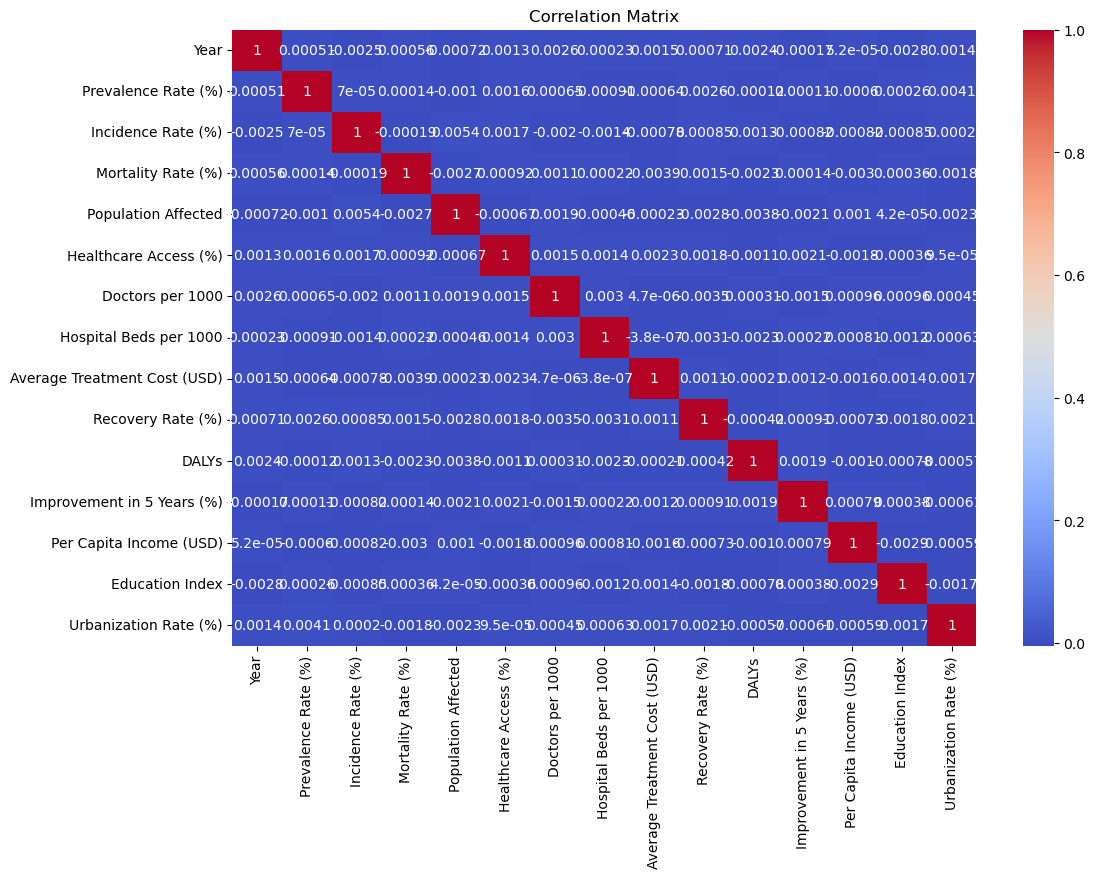

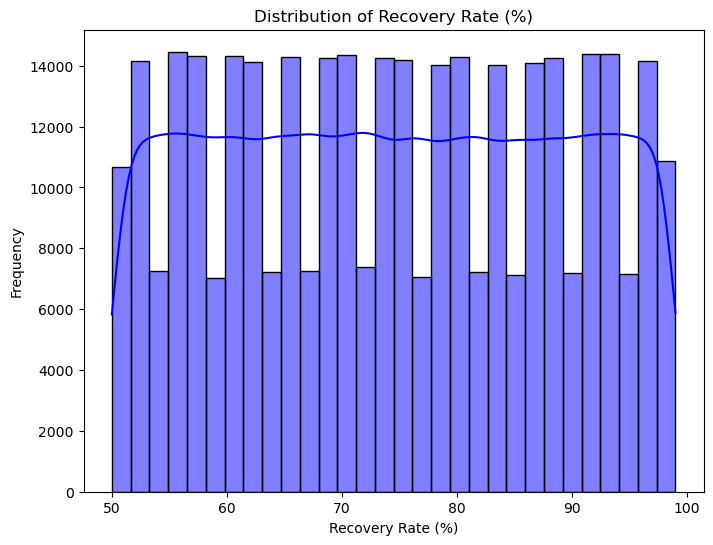

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlation between numerical features
numeric_data = clean_treat_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Check distribution of the target variable if present (e.g., 'Recovery Rate')
if 'Recovery Rate (%)' in clean_treat_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(clean_treat_df['Recovery Rate (%)'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Recovery Rate (%)")
    plt.xlabel("Recovery Rate (%)")
    plt.ylabel("Frequency")
    plt.show()


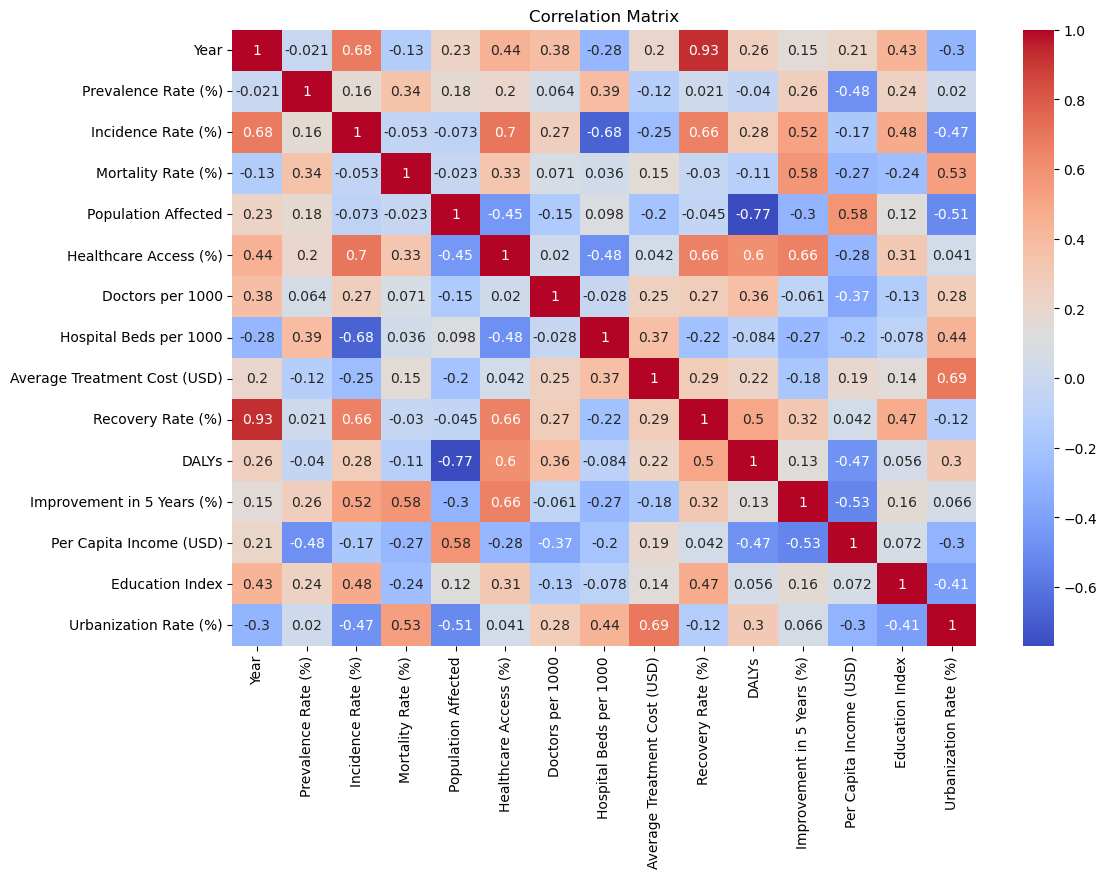

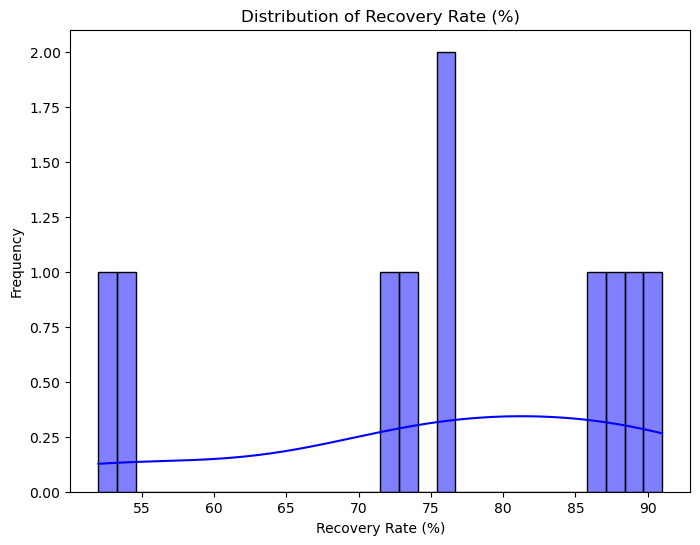

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlation between numerical features
numeric_data = med_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Check distribution of the target variable if present (e.g., 'Recovery Rate')
if 'Recovery Rate (%)' in med_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(med_df['Recovery Rate (%)'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Recovery Rate (%)")
    plt.xlabel("Recovery Rate (%)")
    plt.ylabel("Frequency")
    plt.show()

Model Evaluation Results:
Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.25
R² Score: 0.75


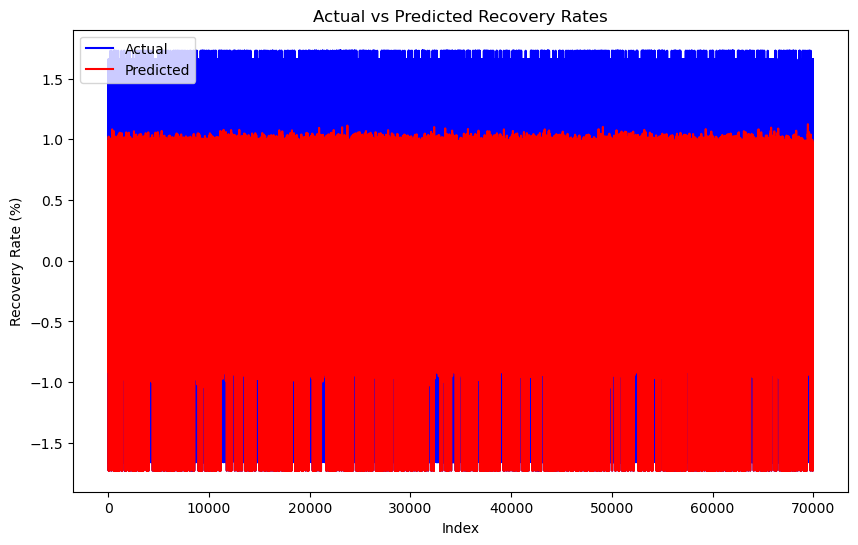

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Step 1: Handle missing values
# Impute missing values for numerical features using the median
num_imputer = SimpleImputer(strategy="median")
num_cols = clean_treat_df.select_dtypes(include=["float64", "int64"]).columns
clean_treat_df[num_cols] = num_imputer.fit_transform(clean_treat_df[num_cols])

# Impute missing values for categorical features using the most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_cols = clean_treat_df.select_dtypes(include=["object"]).columns
clean_treat_df[cat_cols] = cat_imputer.fit_transform(clean_treat_df[cat_cols])

# Step 2: Remove outliers
# Calculate z-scores for numerical columns
z_scores = zscore(clean_treat_df[num_cols])

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
data_cleaned = clean_treat_df[~outlier_indices]

# Step 3: Encode categorical variables
# Convert categorical features into dummy variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Step 4: Feature scaling
# Normalize numerical features to a standard scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded)

# Recreate a clean DataFrame with scaled features
final_cleaned_df = pd.DataFrame(scaled_features, columns=data_encoded.columns)

# Step 5: Split into features and target variable
X = final_cleaned_df.drop("Recovery Rate (%)", axis=1)
y = final_cleaned_df["Recovery Rate (%)"]

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf_model.predict(X_test)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 10: Visualize actual vs predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results_df = results_df.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df["Actual"], label="Actual", color="blue")
plt.plot(results_df.index, results_df["Predicted"], label="Predicted", color="red")
plt.title("Actual vs Predicted Recovery Rates")
plt.xlabel("Index")
plt.ylabel("Recovery Rate (%)")
plt.legend()
plt.show()
